Welchen Einfluss haben die Events auf den Umsatz?

In [1]:
import pandas as pd
import csv

df = pd.read_csv('/workspaces/MA-bakery-sales-prediction/_data_raw/df_umsatz.csv')
print(df.head())
print(df.columns)

        Datum  Warengruppe      Umsatz
0  2013-07-01            1  148.828353
1  2013-07-02            1  159.793757
2  2013-07-03            1  111.885594
3  2013-07-04            1  168.864941
4  2013-07-05            1  171.280754
Index(['Datum', 'Warengruppe', 'Umsatz'], dtype='object')


In [2]:
import pandas as pd
import csv

df2 = pd.read_csv('/workspaces/MA-bakery-sales-prediction/_data_raw/df_kiel_events.csv')
print(df2.head())

         date  national_holiday  christmas_market  maritime_conference  \
0  01.07.2013                 0                 0                    0   
1  02.07.2013                 0                 0                    0   
2  03.07.2013                 0                 0                    0   
3  04.07.2013                 0                 0                    0   
4  05.07.2013                 0                 0                    0   

   nordic_film_days  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  


In [3]:
# Convert both date columns to datetime format
df['Datum'] = pd.to_datetime(df['Datum'], format='%Y-%m-%d')
df2['date'] = pd.to_datetime(df2['date'], format='%d.%m.%Y')

# Merge the two DataFrames on the common date column
merged_df = pd.merge(df, df2, left_on='Datum', right_on='date', how='inner')

# Drop redundant columns if needed
merged_df = merged_df.drop(columns=['date'])

print(merged_df)
print(merged_df.columns)

          Datum  Warengruppe      Umsatz  national_holiday  christmas_market  \
0    2013-07-01            1  148.828353                 0                 0   
1    2013-07-02            1  159.793757                 0                 0   
2    2013-07-03            1  111.885594                 0                 0   
3    2013-07-04            1  168.864941                 0                 0   
4    2013-07-05            1  171.280754                 0                 0   
...         ...          ...         ...               ...               ...   
8269 2017-12-21            6   87.471228                 0                 1   
8270 2017-12-22            6   71.911652                 0                 1   
8271 2017-12-23            6   84.062223                 0                 1   
8272 2017-12-24            6   60.981969                 0                 1   
8273 2017-12-27            6   34.972644                 0                 0   

      maritime_conference  nordic_film_

In [4]:
pip install --upgrade pandas



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Save the merged DataFrame to a CSV file
merged_df.to_csv('merged_table.csv', index=False)

print("CSV file saved successfully!")


CSV file saved successfully!


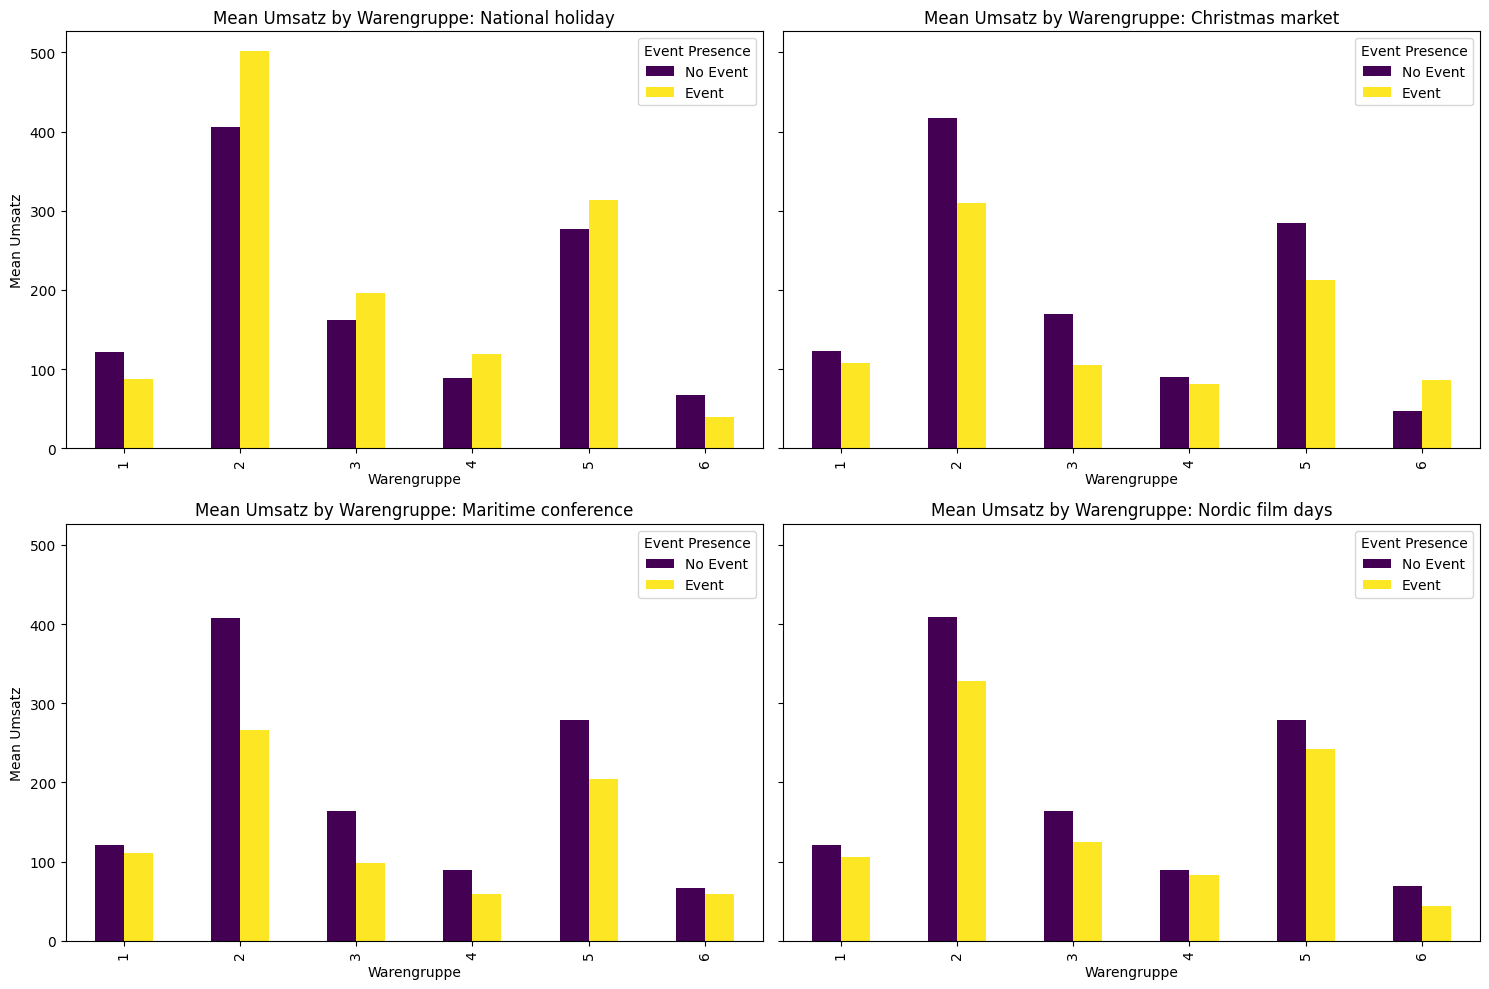

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of events
event_columns = ['national_holiday', 'christmas_market', 'maritime_conference', 'nordic_film_days']

# Prepare a dictionary to store mean comparisons
comparison_data = {}

for event in event_columns:
    # Group by Warengruppe and event presence
    grouped = merged_df.groupby(['Warengruppe', event])['Umsatz'].mean().unstack()
    
    # Add to comparison data
    comparison_data[event] = grouped

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)

for ax, (event, data) in zip(axes.flat, comparison_data.items()):
    data.plot(kind='bar', ax=ax, colormap='viridis')
    ax.set_title(f"Mean Umsatz by Warengruppe: {event.replace('_', ' ').capitalize()}")
    ax.set_ylabel("Mean Umsatz")
    ax.set_xlabel("Warengruppe")
    ax.legend(["No Event", "Event"], title="Event Presence")

plt.tight_layout()
plt.show()
